In [2]:
#!pip install fredapi 

In [3]:
#!pip install plotly-express

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = "insert-your-key"

In [5]:
## Create the FRED object

fred = Fred(api_key=fred_key)

In [6]:
## Search economic data
sp_search = fred.search('S&P', order_by='popularity')

sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-02-15,2023-02-15,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-02-14,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-15 08:27:06-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-02-15,2023-02-15,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-01-31 08:01:02-06:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-02-15,2023-02-15,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-02-14,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-15 08:27:11-06:00,84,This data represents the effective yield of th...
SP500,SP500,2023-02-15,2023-02-15,S&P 500,2013-02-15,2023-02-14,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-02-14 19:10:51-06:00,84,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2023-02-15,2023-02-15,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-01-31 08:01:04-06:00,82,"For more information regarding the index, plea..."


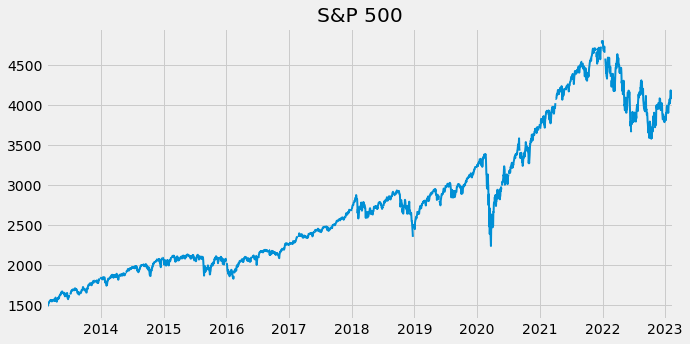

In [7]:
## Pull raw data & plot

sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)
plt.show()

In [8]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-02-15,2023-02-15,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-02-15,2023-02-15,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-03 07:43:02-06:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2023-02-15,2023-02-15,Unemployment Level,1948-01-01,2023-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-02-03 07:44:05-06:00,69,The series comes from the 'Current Population ...
U6RATE,U6RATE,2023-02-15,2023-02-15,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:13-06:00,67,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2023-02-15,2023-02-15,Unemployment Rate - Black or African American,1972-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:12-06:00,66,The series comes from the 'Current Population ...


In [9]:
unemp_df.query('seasonal_adjustment == "Seasonally Adjusted"')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-02-15,2023-02-15,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2023-02-15,2023-02-15,Unemployment Level,1948-01-01,2023-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-02-03 07:44:05-06:00,69,The series comes from the 'Current Population ...
U6RATE,U6RATE,2023-02-15,2023-02-15,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:13-06:00,67,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2023-02-15,2023-02-15,Unemployment Rate - Black or African American,1972-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:12-06:00,66,The series comes from the 'Current Population ...
CAUR,CAUR,2023-02-15,2023-02-15,Unemployment Rate in California,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,59,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS13025701,LNS13025701,2023-02-15,2023-02-15,"Of Total Unemployed, Percent Unemployed 5-14 W...",1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:45:30-06:00,5,The series comes from the 'Current Population ...
LNS14000061,LNS14000061,2023-02-15,2023-02-15,"Unemployment Rate - 25-54 Yrs., Men",1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:45:35-06:00,3,The series comes from the 'Current Population ...
LNS13023569,LNS13023569,2023-02-15,2023-02-15,Unemployment Level - New Entrants,1967-01-01,2023-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-02-03 07:44:58-06:00,6,The series comes from the 'Current Population ...


In [10]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [11]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-02-15,2023-02-15,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-02-15,2023-02-15,Unemployment Rate - Black or African American,1972-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:12-06:00,66,The series comes from the 'Current Population ...
CAUR,CAUR,2023-02-15,2023-02-15,Unemployment Rate in California,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,59,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-02-15,2023-02-15,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,56,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-02-15,2023-02-15,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,21,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CWSTUR,CWSTUR,2023-02-15,2023-02-15,Unemployment Rate in West Census Region,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:25-06:00,7,None
CSOUUR,CSOUUR,2023-02-15,2023-02-15,Unemployment Rate in South Census Region,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:23-06:00,7,None
USAURAMS,USAURAMS,2023-02-15,2023-02-15,Unemployment Rate in the United States (DISCON...,2007-01-01,2013-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2013-09-03 11:06:07-05:00,3,Bureau of Labor Statistics (BLS) has eliminate...


In [12]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')].shape

(99, 15)

In [14]:
all_results = [ ]

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1)
unemp_results = pd.concat(all_results, axis=1)

In [15]:
unemp_results.head()

,UNRATE,U6RATE,LNS14000006,CAUR,M0892AUSM156SNBR,M0892BUSM156SNBR,LNS14000031,U2RATE,LNS14000024,FLUR,TXUR,LNS14000002,NYUR,LNS14000009,LNS14027662,LNS14000001,OHUR,LNS14000003,U4RATE,LNS14027660,MIUR,LNS14032183,PAUR,NCUR,TNUR,LRUN64TTUSM156S,ALUR,ILUR,LBSSA06,MAUR,VAUR,MNUR,NJUR,KYUR,LBSSA12,GAUR,COUR,WAUR,LNS14000012,MOUR,SCUR,LNS14027659,AZUR,U5RATE,WIUR,INUR,NMUR,LBSSA01,AKUR,WVUR,LNS14024887,OKUR,NVUR,ARUR,ORUR,MDUR,LBSSA55,LBSSA21,LBSSA48,LNS14000018,LAUR,UTUR,U1RATE,LBSSA27,LNS13023706,LASMT261982000000003,LBSSA39,LNS14000028,HIUR,LBSSA26,LNS13025703,NDUR,LNS14000032,LBSSA36,IAUR,MTUR,PRUR,LNS13023654,NEUR,NHUR,LNS14000060,LBSSA25,LBSSA17,MSUR,IDUR,SDUR,KSUR,LBSSA47,LASMT391746000000003,LBSSA37,DCUR,MEUR,LNS14000029,LBSSA49,LBSSA19,VTUR,DEUR,CTUR,LBSSA23,LBSSA54,NEIM156SFRBRIC,LNS14000036,LBSSA35,LBSSA32,LBSSA42,LBSSA18,LBSSA51,LBSSA22,LBSSA08,CMWRUR,RIUR,WYUR,LNS14000026,LNS14027689,LRHUTTTTUSM156S,LBSSA13,LNS14000025,LBSSA41,LNS14024230,LBSSA24,CNERUR,LBSSA04,LBSSA29,LRUNTTTTUSM156S,LBSSA40,LBSSA28,LBSSA53,LNS13023558,LNS14000315,LNS13023622,LRUN24TTUSM156S,LBSSA45,LNS13008397,LBSSA30,LBSSA31,LBSSA20,LBSSA16,LBSSA15,LBSSA50,LNS14000089,LNS14200000,LNS14000093,LNS14000048,LBSSA02,LBSSA05,LBSSA34,CNEWUR,LBSSA09,LNS14000091,CWSTUR,CSOUUR,LNS13026511,LNS13023570,USAURAMS,LBSSA56,LBSSA38,LBSSA46,LBSSA33,LNS14100000,NEIPTERM156SFRBRIC,LNS13025701,LNS14000061
1929-04-01,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [16]:
cols_to_drop = [ ]
for i in unemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
unemp_results = unemp_results.drop(columns = cols_to_drop, axis=1)

In [17]:
unemp_results.head()

,CAUR,FLUR,TXUR,NYUR,OHUR,MIUR,PAUR,NCUR,TNUR,ALUR,ILUR,MAUR,VAUR,MNUR,NJUR,KYUR,GAUR,COUR,WAUR,MOUR,SCUR,AZUR,WIUR,INUR,NMUR,AKUR,WVUR,OKUR,NVUR,ARUR,ORUR,MDUR,LAUR,UTUR,HIUR,NDUR,IAUR,MTUR,PRUR,NEUR,NHUR,MSUR,IDUR,SDUR,KSUR,DCUR,MEUR,VTUR,DEUR,CTUR,RIUR,WYUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
uemp_states = unemp_results.copy()
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [19]:
px.line(uemp_states)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=California<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'California',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'California',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2022, 6, 1, 0, 0),
                          datetime.datetime(2022, 7, 1, 0, 0),
                          datetime.datetime(2022, 8, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.2, 9.2, 9.1, ..., 4.2, 3.9, 4.1]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Florida<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Florida',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Florida',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2022, 6, 1, 0, 0),
                          datetime.datetime(2022, 7, 1, 0, 0),
                          datetime.datetime(2022, 8, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.7, 9.7, 9.6, ..., 2.8, 2.7, 2.7]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Texas<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Texas',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Texas',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2022, 6, 1, 0, 0),
                          datetime.datetime(2022, 7, 1, 0, 0),
                          datetime.datetime(2022, 8, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([5.8, 5.8, 5.9, ..., 4.1, 4. , 4.1]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=New York<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'New York',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'New York',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2022, 6, 1, 0, 0),
                          datetime.datetime(2022, 7, 1, 0, 0),
                          datetime.datetime(2022, 8, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([10.3, 10.3, 10.2, ...,  4.4,  4.3,  4.7]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=Ohio<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Ohio',
              'line': {'color': '#FFA15A', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Ohio',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetim

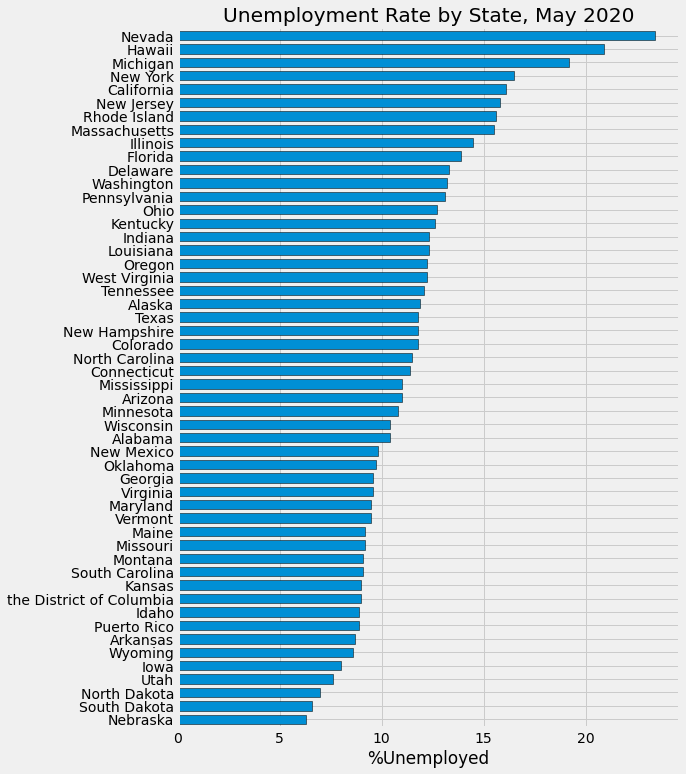

In [ ]:
# Get April 2020 Unemployment Rate per State

ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T\
    .sort_values('2020-05-01')\
        .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
        title='Unemployment Rate by State, May 2020')

ax.legend().remove()
ax.set_xlabel('%Unemployed')
plt.show()

In [21]:
# Get Participation rate

part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [22]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()

In [30]:
all_results = [ ]

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [31]:
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

IndexError: index 50 is out of bounds for axis 0 with size 50

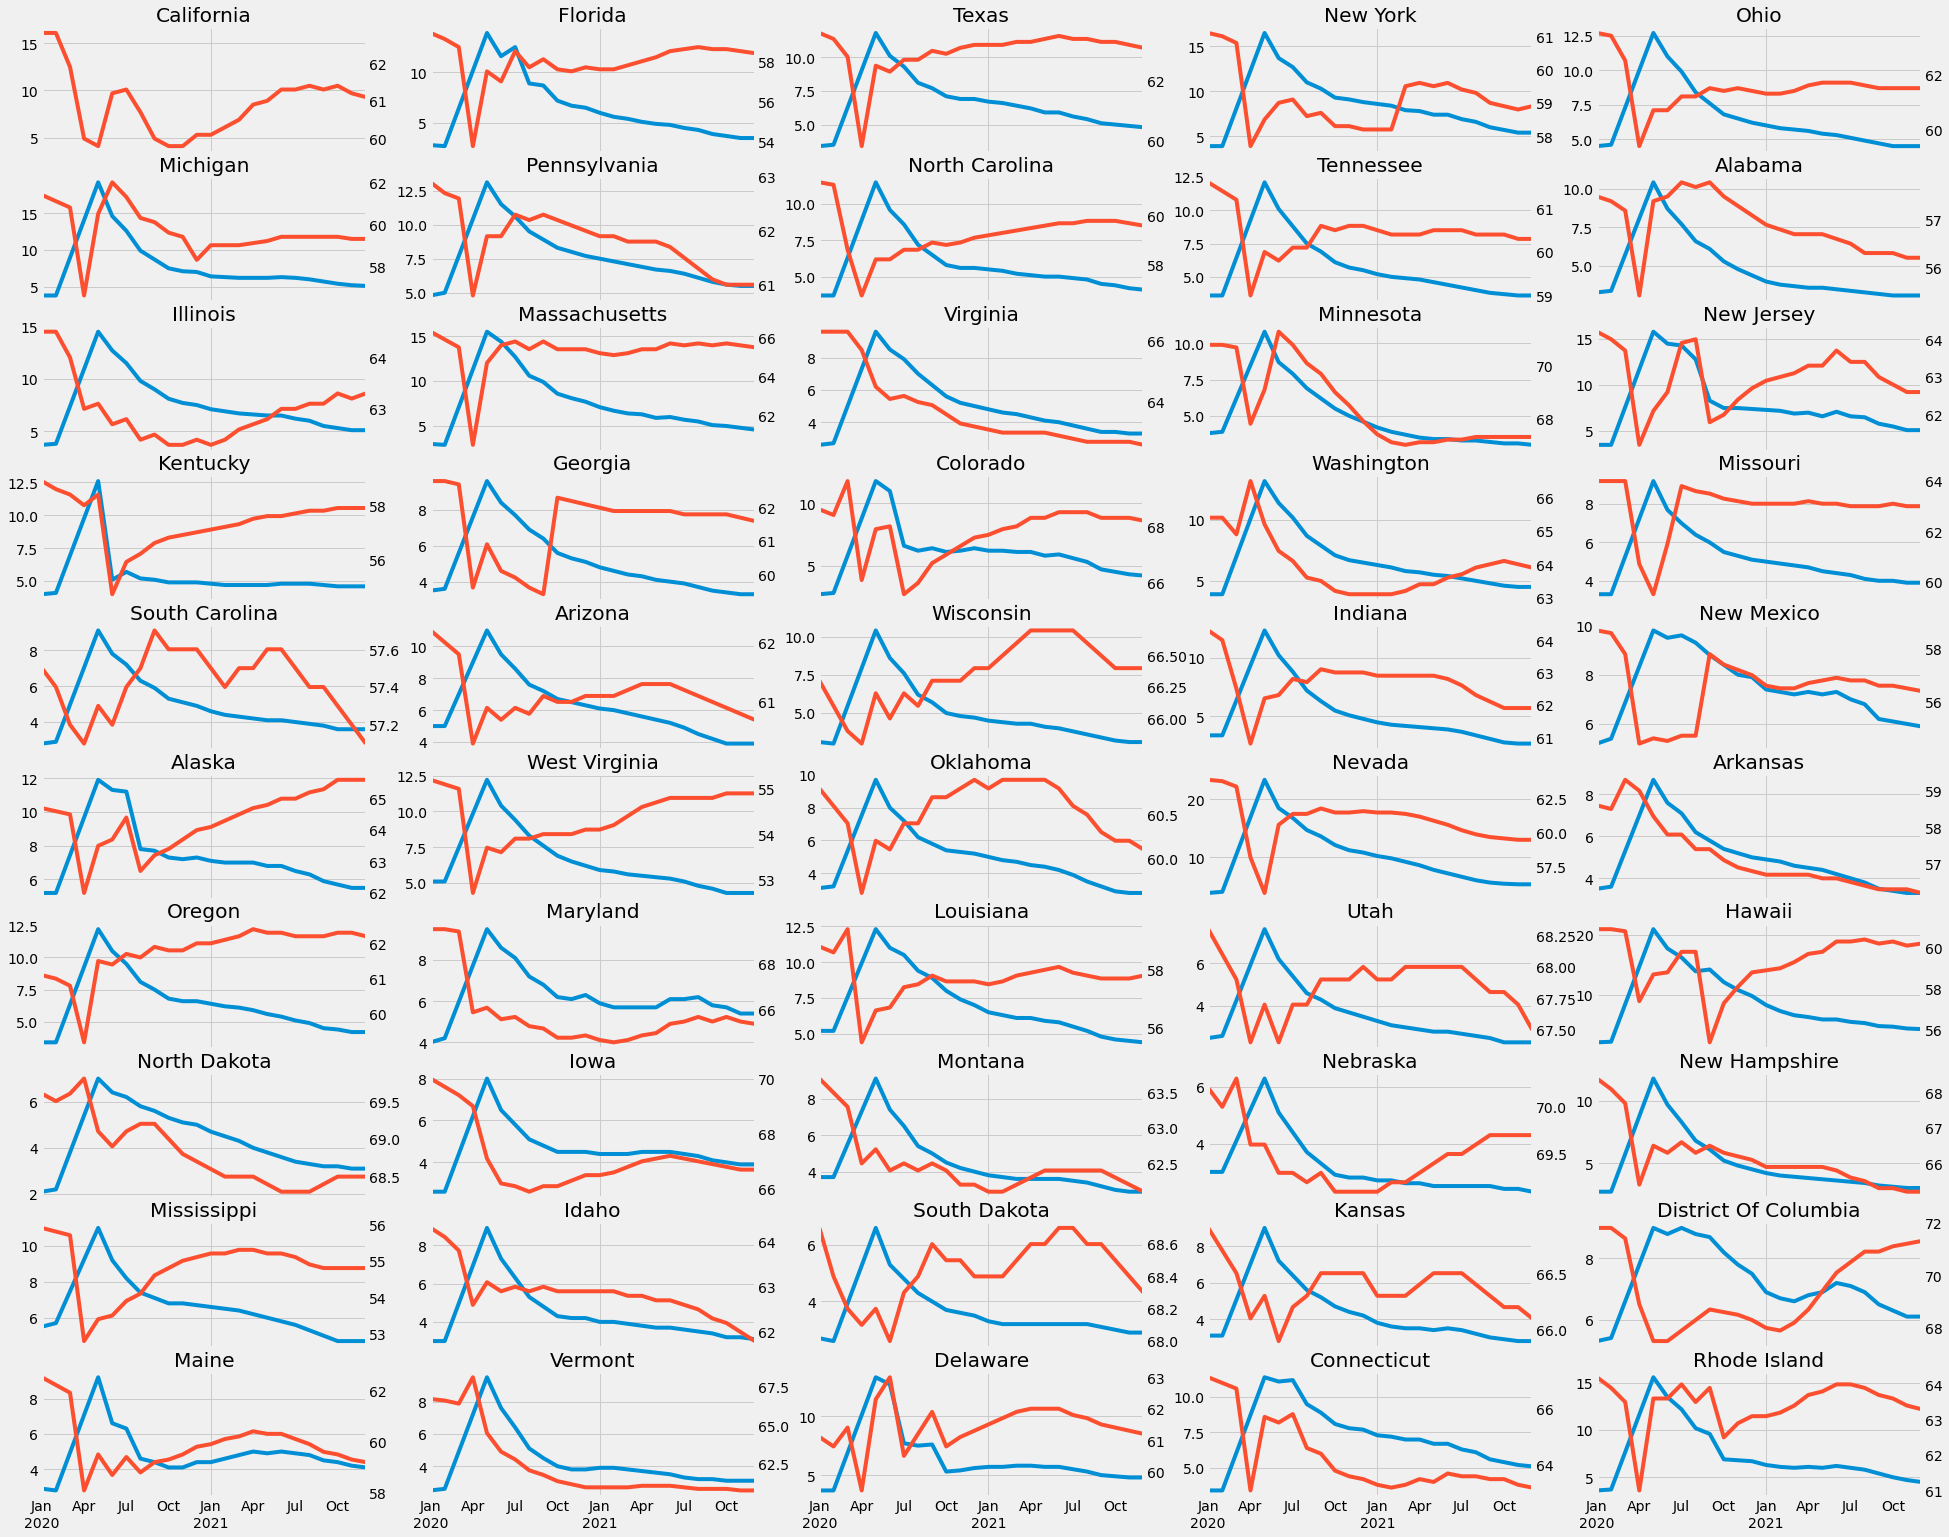

In [32]:
fig, axs = plt.subplots(10, 5, figsize = (30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbi", "Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state]\
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state]\
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()
    